In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from scipy.stats import pearsonr

In [ ]:
# load rankings data
df_wood = pd.read_csv("Golden_Ticket_Award_Winners_Wood.csv")
df_steel = pd.read_csv("Golden_Ticket_Award_Winners_Steel.csv")

In [ ]:
#  Create a function to plot rankings over time for 1 roller coaster
def plot_roller(name, supplier):
  plt.clf()
  df = df_wood[(df_wood["Name"] == name) & (df_wood["Supplier"] == supplier)][["Rank", "Year of Rank"]]
  ax = plt.subplot()
  rank_inverse = range(df.Rank.unique().max(), 0, -1)
  plt.plot(df["Year of Rank"], df["Rank"])
  ax.set_yticks(rank_inverse)
  ax.invert_yaxis()
  ax.set_xticks(df["Year of Rank"])
  plt.title(str(name) + " Roller Coaster Ranking")
  plt.ylabel("Ranking")
  plt.show()

In [ ]:
# Create a plot of El Toro ranking over time
plot_roller("El Toro", "Intamin")

In [ ]:
# Create a plot of El Toro and Boulder dash hurricanes
plot_roller("Boulder Dash", "CCI")

In [8]:
# Create a function to plot top n rankings over time
def two_plot_roller(r1, s1, r2, s2):
  plt.clf()
  name1 = r1
  name2 = r2

  r1 = df_wood[(df_wood.Name == r1) & (df_wood.Supplier == s1)][["Rank", "Year of Rank"]]
  r2 = df_wood[(df_wood.Name == r2) & (df_wood.Supplier == s2)][["Rank", "Year of Rank"]]
  
  ax = plt.subplot()

  plt.plot(r1["Year of Rank"], r1["Rank"], label = name1, marker = "o")
  plt.plot(r2["Year of Rank"], r2["Rank"], label = name2, marker = "o")

  ax.invert_yaxis()
  ax.set_yticks(r1["Rank"])
  plt.legend()
  plt.show()

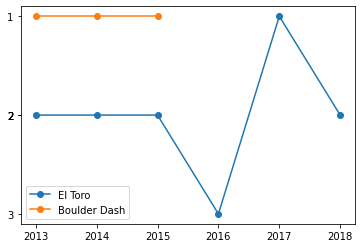

In [9]:
# Create a plot of top n rankings over time
two_plot_roller("El Toro", "Intamin", "Boulder Dash", "CCI")

In [10]:
# load roller coaster data
def top_rank(n):
  plt.clf()
  df = df_steel[df_steel.Rank <= n]
  df = df[["Rank", "Name", "Year of Rank"]]
  df = df.groupby("Name")

  label_names = []
  plt.figure(figsize = (12, 10))

  for df1 in df:
    years = df1[1]["Year of Rank"]
    ranks = df1[1]["Rank"]
    label_names.append(df1[0])
    plt.plot(years, ranks, marker = "o")

  ax = plt.subplot()
  ax.invert_yaxis()
  plt.legend(label_names)
  plt.title("Top " + str(n) + " roller coasters")
  plt.xlabel("Years")
  plt.ylabel("Ranking")
  plt.show()

<Figure size 432x288 with 0 Axes>

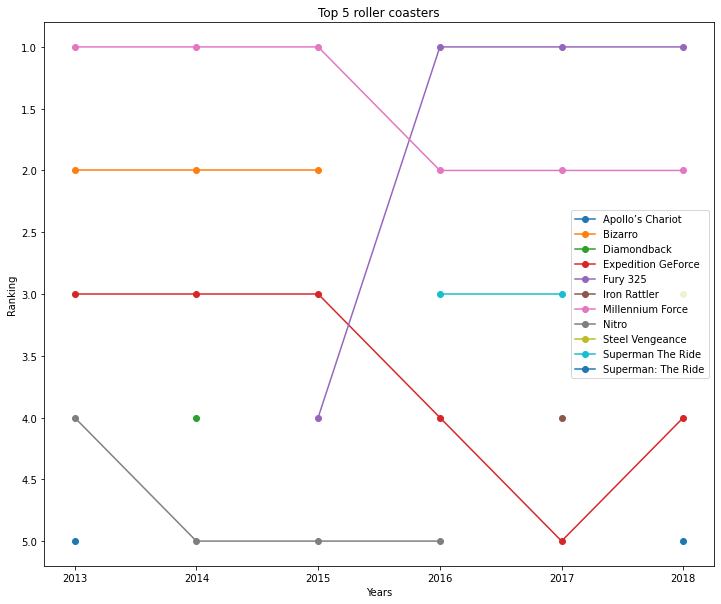

In [11]:
top_rank(5)

In [13]:
# Data Frame Captain Coaster
df_cc = pd.read_csv("roller_coasters.csv")

In [12]:
# Create a function to plot histogram of column values
def plot_column(column):
  plt.clf()
  column = column.dropna()
  plt.hist(column, bins = 30)
  plt.title(column.name)
  plt.show()

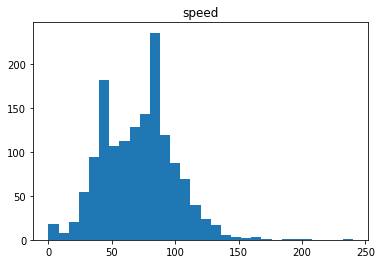

In [14]:
# Create histogram of roller coaster speed
plot_column(df_cc.speed)

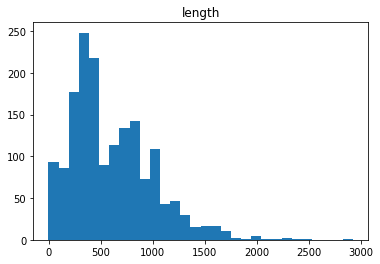

In [15]:
# Create histogram of roller coaster length
plot_column(df_cc.length)

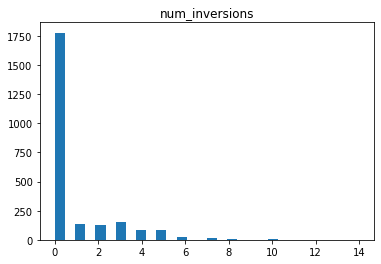

In [16]:
# Create histogram of roller coaster number of inversions
plot_column(df_cc.num_inversions)

In [17]:
# Create a function to plot histogram of height values
def roler_height(column):
  plt.clf()
  column = column.dropna()
  plt.hist(column, bins = 60, range = (0, 200))
  plt.title(column.name)
  plt.show()

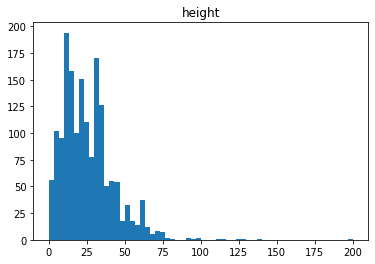

In [18]:
# Create a histogram of roller coaster height
roler_height(df_cc.height)

In [25]:
# Create a function to plot inversions by coaster at park
def plot_inversion(park):
  # Buscar primero el parque 
  df = df_cc[df_cc.park == park][["name", "num_inversions"]]
  df = df[df.num_inversions > 0]

  # Segundo buscar sus rollercoster
  name = df.name
  num_inversions = df.num_inversions
  
  plt.clf()
  plt.figure(figsize = (15, 15))
  plt.bar(range(len(name)), num_inversions)
  ax = plt.subplot()
  ax.set_xticks(range(len(name)))
  ax.set_xticklabels(name, rotation = 80, fontsize = 10)
  plt.title("Roller Coaster Inversion")
  plt.xlabel("Roller Coaster")
  plt.ylabel("Num Inversions")
  plt.show()


<Figure size 432x288 with 0 Axes>

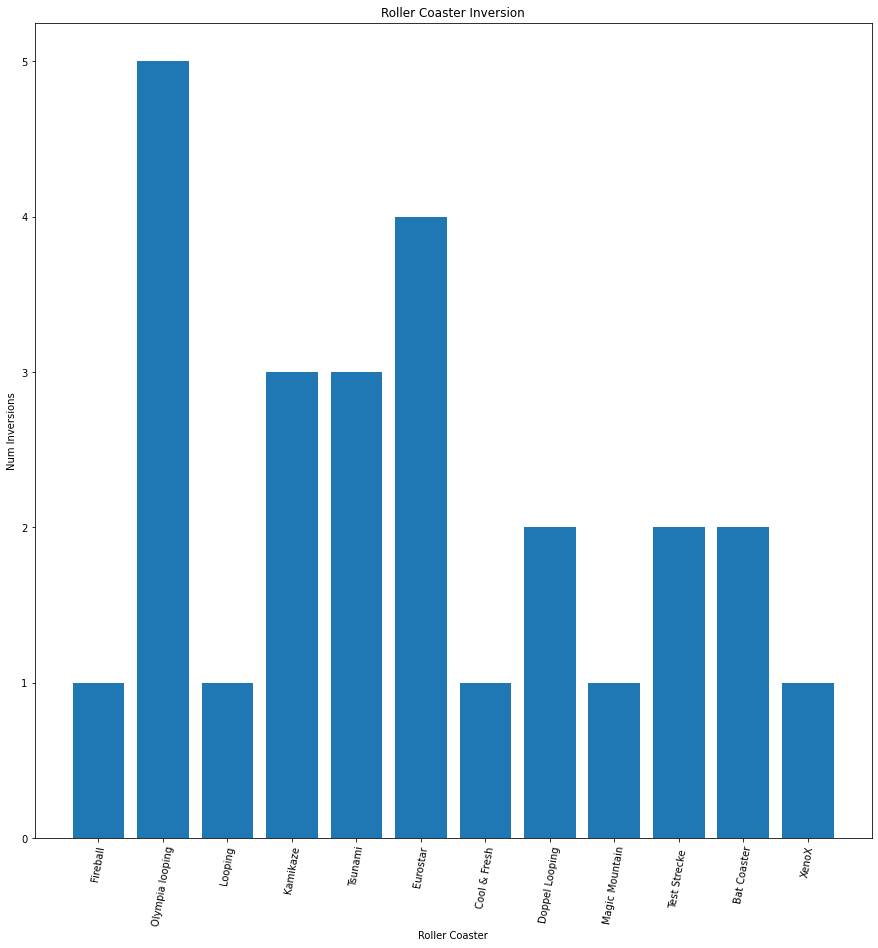

In [26]:
# Create barplot of inversions by roller coasters
plot_inversion("Foire")

In [27]:
# Create a function to plot a pie chart of status.operating
def status(df):
  values = []
  opens = np.sum(df.status == "status.operating")
  close = np.sum(df.status == "status.closed.definitely")
  label = ["Open", "Closed"]

  plt.clf()
  plt.pie([opens, close], labels = label, autopct = "%d%%", explode = [0, 0.1])
  plt.legend()
  plt.axis("Equal")
  plt.show()

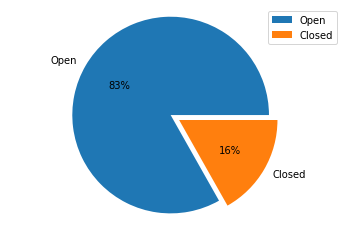

In [28]:
# Create pie chart of roller coasters
status(df_cc)

In [29]:
# Create a function to plot scatter of any two columns
def scatter_columns(column1, column2):
  plt.clf()

  sns.lmplot(data = df_cc, x = column1.name, y = column2.name)
  plt.title(str(column1.name) + " vs " + str(column2.name)) 

  plt.show()

<Figure size 432x288 with 0 Axes>

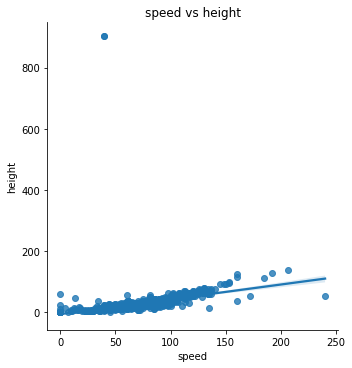

In [30]:
# Create a function to plot scatter of speed vs height
scatter_columns(df_cc.speed, df_cc.height)

<Figure size 432x288 with 0 Axes>

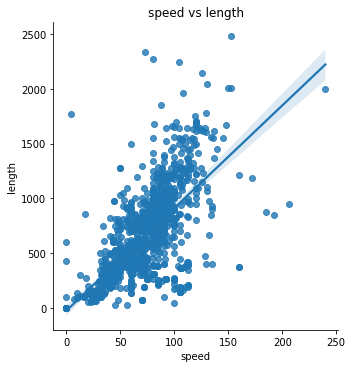

In [31]:
# Create a scatter plot of roller coaster height by speed
scatter_columns(df_cc.speed, df_cc.length)

<Figure size 432x288 with 0 Axes>

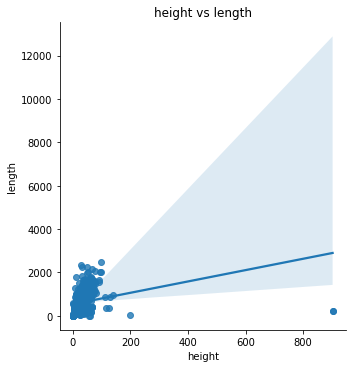

In [32]:
# Create a scatter plot of roller coaster height by length
scatter_columns(df_cc.height, df_cc.length)

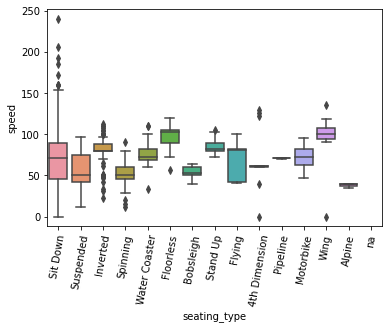

In [37]:
# What roller coaster seating type is most popular? And do different seating types result in higher/faster/longer roller coasters?
plt.clf()
sns.boxplot(data = df_cc, x = "seating_type", y = "speed")
plt.xticks(rotation = 80)
plt.show()

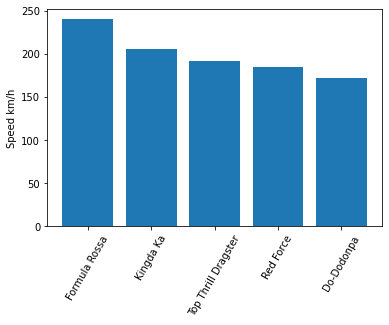

In [71]:
# Fastest Roller Coasters 
df = df_cc[df_cc.speed > 170].sort_values(by = "speed", ascending = False).reset_index(drop =True)

plt.clf()
plt.bar(range(len(df.name[:5])), df.speed[:5])
ax = plt.subplot()
ax.set_xticks(range(len(df.name[:5])))
ax.set_xticklabels(df.name, rotation = 60)
plt.ylabel("Speed km/h")
plt.show()

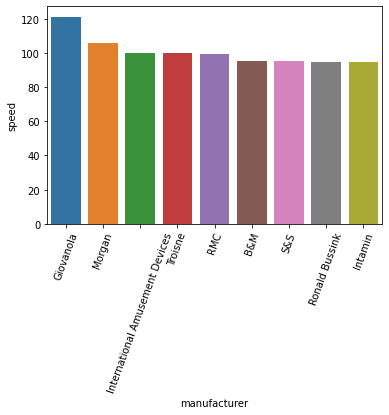

In [72]:
# Do roller coaster manufacturers have any specialties (do they focus on speed, height, seating type, or inversions)?
# Speed Manufacturers
speed_manufacturer =  df_cc.groupby("manufacturer").speed.mean().reset_index()
speed_manufacturer = speed_manufacturer.sort_values(by = "speed", ascending = False).reset_index(drop = True)

top_10 = speed_manufacturer[:9]
plt.clf()
sns.barplot(data = top_10, x = "manufacturer", y = "speed")
plt.xticks(rotation = 70)
plt.show()

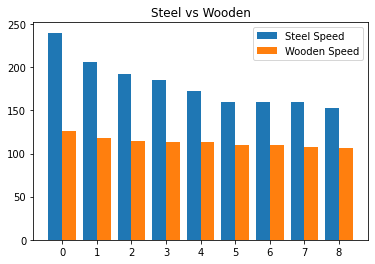

In [97]:
# Speed comparison between wood and steel top 10
df_wood_steel = df_cc[["name", "material_type", "speed", "manufacturer"]]

# Top 10 Steel 
top_10_steel = df_wood_steel[df_wood_steel.material_type == "Steel"][["name", "speed"]].sort_values(by = "speed", ascending = False)[:9]
top_10_wood = df_wood_steel[df_wood_steel.material_type == "Wooden"][["name", "speed"]].sort_values(by = "speed", ascending = False)[:9]

x1_values = [2 * index + 0.8 * 1 for index in range(len(top_10_steel.name))]
x2_values = [2 * index + 0.8 * 2 for index in range(len(top_10_wood.name))]
x_values = [a + (b - a) / 2 for a ,b in zip(x1_values, x2_values)]
x_label = range(len(x_values))

plt.clf()
plt.bar(x1_values, top_10_steel.speed, label = "Steel Speed")
plt.bar(x2_values, top_10_wood.speed, label = 'Wooden Speed')

ax = plt.subplot()

ax.set_xticks(x_values)
ax.set_xticklabels(x_label)

plt.title('Steel vs Wooden')
plt.legend()
plt.show()

